In [118]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [119]:
from __future__ import division
import numpy as np
from setup import *
from OrbitalMotion import numerical_orbital_evolution, analytical_orbital_evolution
c,G,Msolar,AU, pc = univeral_constants()

In [120]:
#Choose system parameters 

#---Inner Binary---
m0 = 30*Msolar
m1 = 30*Msolar
f1 = 1e-3 #orbital frequency
a1 = semi_major_axis(m0+m1,f1)
e1 = 0.5 #eccentricity
g1 = np.pi/4
J1 = angular_momentum(m0,m1,e1,a1)#angular momentum. Eq. 12 of Randal

#---Outer Binary
beta=5
a2 = beta * a1
m2 = 10*Msolar
e2 = 0.6

#---Shared---
I = 60 * np.pi/180.0 #Inclination
nmodes = 20 #number of modes to sum over for GW
iota = 20 * np.pi/180  #angle of L vector w.r.t observer LOS 
D = 1e6 * pc #distance from source to observer 1Mpc


#---Integration settings
Tint = 0.01
fs = 1e-1

#---Info for user
status(fs, Tint)



Sampling frequency =  0.1  Hz for an observation period of  0.01  years
Total number of integration steps is  31536.0
Frequency range is:  3.1709791983764586e-06  -  0.05  Hz


In [121]:
#Training set
numerical_motion = numerical_orbital_evolution(m0,m1,m2,a1,e1,g1,J1,e2,a2,I,4e-4,Tint)

K =  1.1565942657526629e+24
C =  -6.752505469155556e+23
lambda =  2.3869282539699428e+16 6.67e-11 300000000.0 6e+31 6e+31
I =  1.0471975511965976
J2 =  7.182511894390675e+46
Numerical orbital evolution has completed with fs =  0.0004  Hz and Tobs =  0.01  years


In [122]:
#Analytical solution
analytical_motion = analytical_orbital_evolution(numerical_motion,Tint, fs)

popt for gamma: [2.17209725e-05 6.85614205e-01]
Analytical orbital evolution has completed with fs =  0.1  Hz and Tobs =  0.01  years


In [123]:
#Numerical solution
numerical_motion = numerical_orbital_evolution(m0,m1,m2,a1,e1,g1,J1,e2,a2,I,fs,Tint)
print (len(numerical_motion))

K =  1.1565942657526629e+24
C =  -6.752505469155556e+23
lambda =  2.3869282539699428e+16 6.67e-11 300000000.0 6e+31 6e+31
I =  1.0471975511965976
J2 =  7.182511894390675e+46
Numerical orbital evolution has completed with fs =  0.1  Hz and Tobs =  0.01  years
31536


Extract for double trig func
G approx: [ 3.14193996e-05  4.33566266e-05 -1.86768534e-01 -3.70351335e-05
  2.16994938e-05  6.86571691e-01  3.23403676e-05]


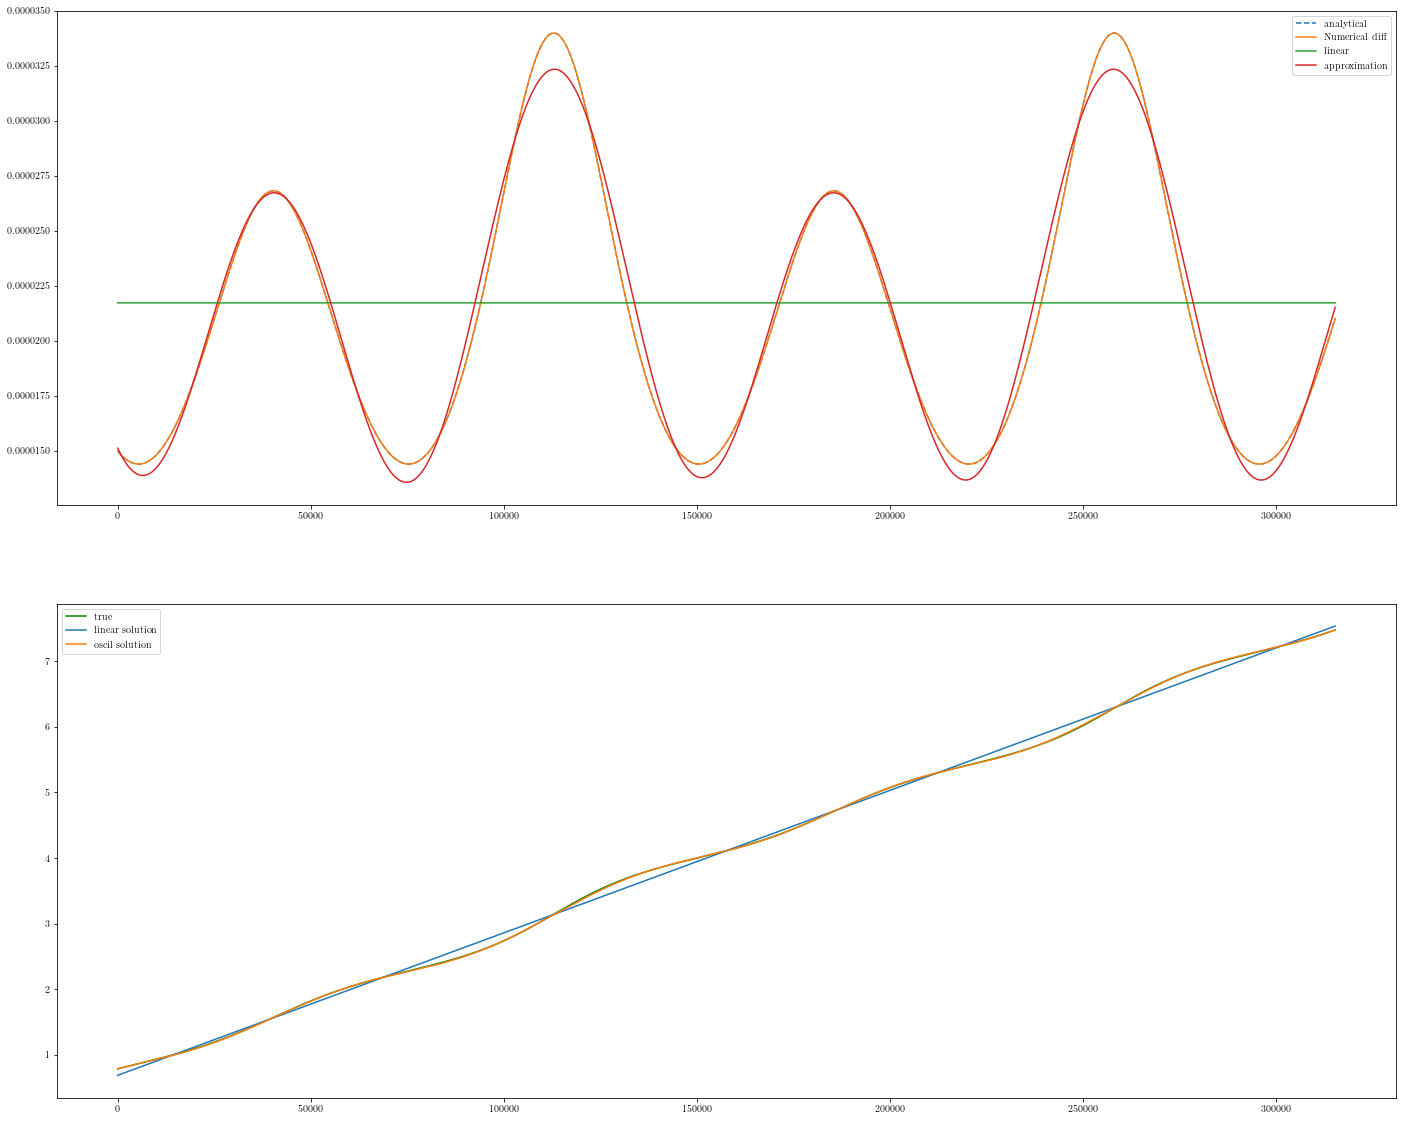

In [141]:
%matplotlib inline
from plot import *
temp(numerical_motion)
#plot_compare_motion(analytical_motion,numerical_motion)
#plot_motion(numerical_motion)
#plot_motion(analytical_motion)


Getting the waveform
Getting the waveform
Plotting the GW
Plotting the GW


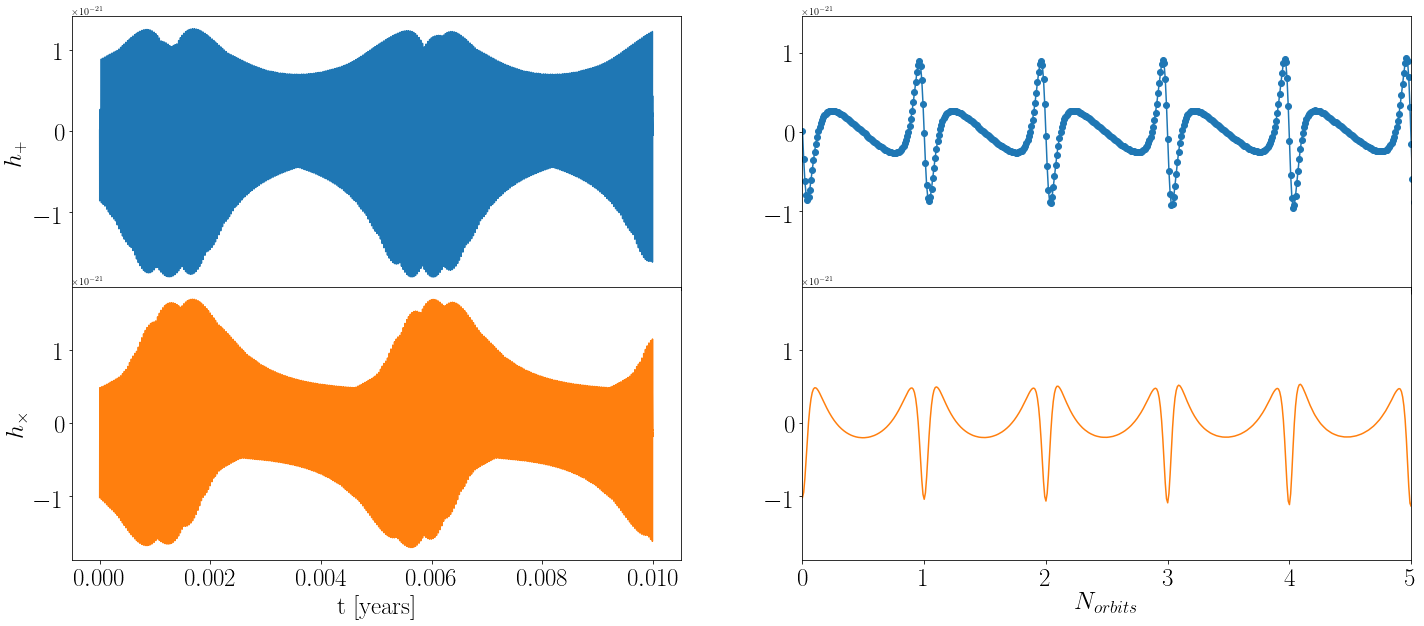

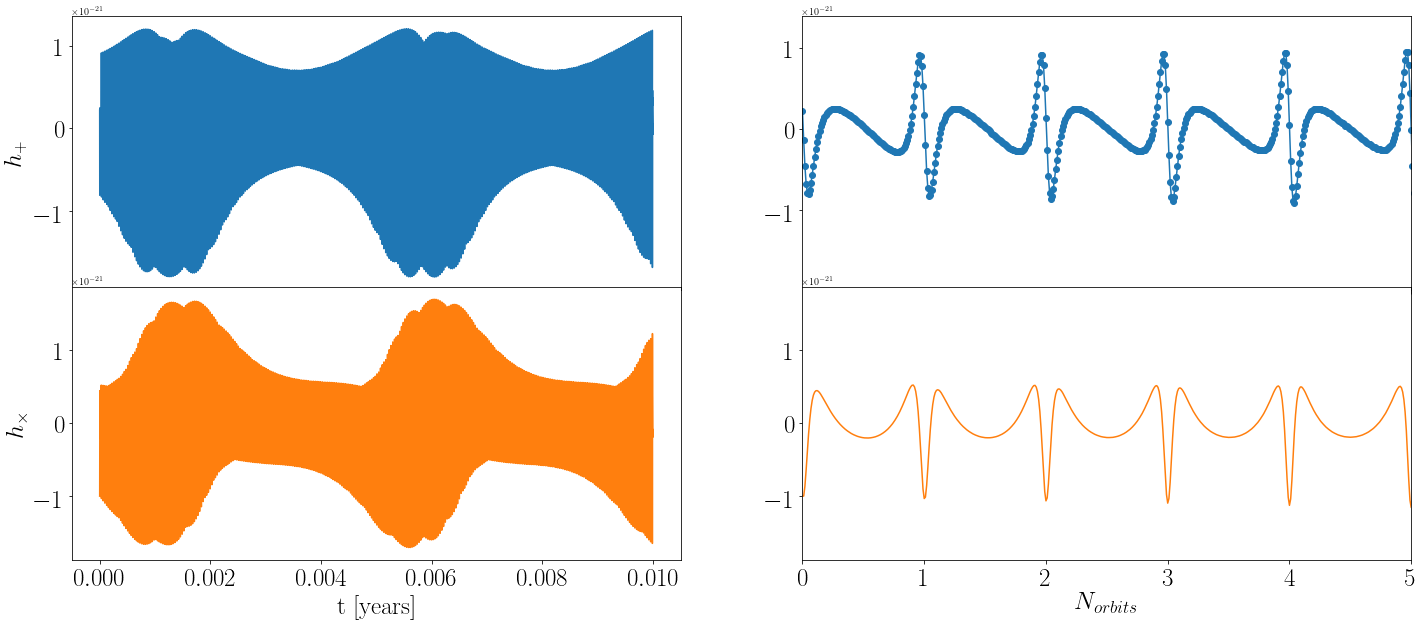

In [125]:
import GravRadiation as GR
constants = np.array([m0+m1, nmodes,iota,m0*m1/(m0+m1),D])
waveformNR = GR.Gwaves(numerical_motion, constants)
waveformAN = GR.Gwaves(analytical_motion, constants)
plot_GW(waveformNR,f1)
plot_GW(waveformAN,f1)

0.1
0.1
overlap =  0.9966425954697515


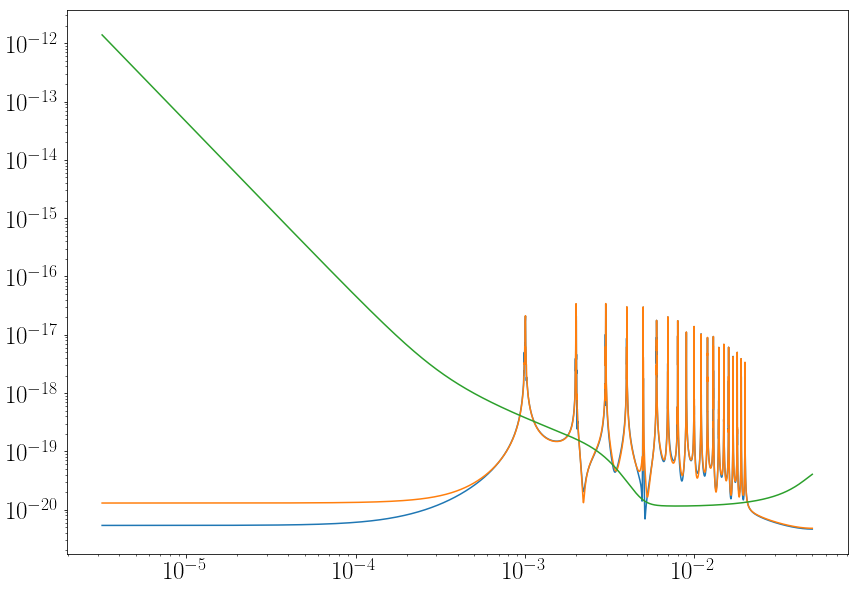

In [126]:
f,h1,h2, S = GR.overlap(waveformNR,waveformAN)
plot_GW_frequency(f,h1,h2, S)

### 